# Demo notebook: Clojupyter in Jupyter Lab

This notebook demonstrates some features of Clojupyter for Jupyter Lab.  Please note that this notebook is intended to be used with **Jupyter Lab**.


## Adding External Clojure Dependencies

You can fetch external Clojure dependencies using the `clojupyter.misc.helper` namespace.

In [1]:
(require '[clojupyter.display :as display])
(require '[clojupyter.misc.helper :as helper])
(helper/add-dependencies '[org.clojure/data.json "0.2.6"])
:ok

:ok

## Charting using Clojure visualization library Oz

[Oz](https://github.com/metasoarous/oz) is a data visualization and scientific document processing library for Clojure built around [Vega Lite](https://vega.github.io/vega-lite/) & [Vega](https://vega.github.io/).  Jupyter Lab has direct support for rendering Vega and Vega Lite charts using the renderer for mime-type (this cell typically takes a little time to evaluate since it loads a library, either by retrieving it from [Clojars](www.clojars.org), or from the file system):

In [2]:
(helper/add-dependencies '[metasoarous/oz "1.5.6"])
(require '[oz.notebook.clojupyter :as oz])
:ok

:ok

For this demo we define some simple functions generating some data compatible with the high-level  charting library:

In [3]:
(defn datapt [[s n]] {:Index s, :Value n})
(defn graph  [vs]    {:data {:values vs}, 
                      :mark :line
                      :encoding {:x {:field :Index}
                                 :y {:field :Value}}})
(def graph-it (comp graph (partial map datapt) (partial apply map vector)));

With a generator for (slightly) random data...

In [4]:
(defn raw-data [] (map #(+ % (rand-int 25)) (range)))

#'user/raw-data

...we can create a graph using Vega Lite:

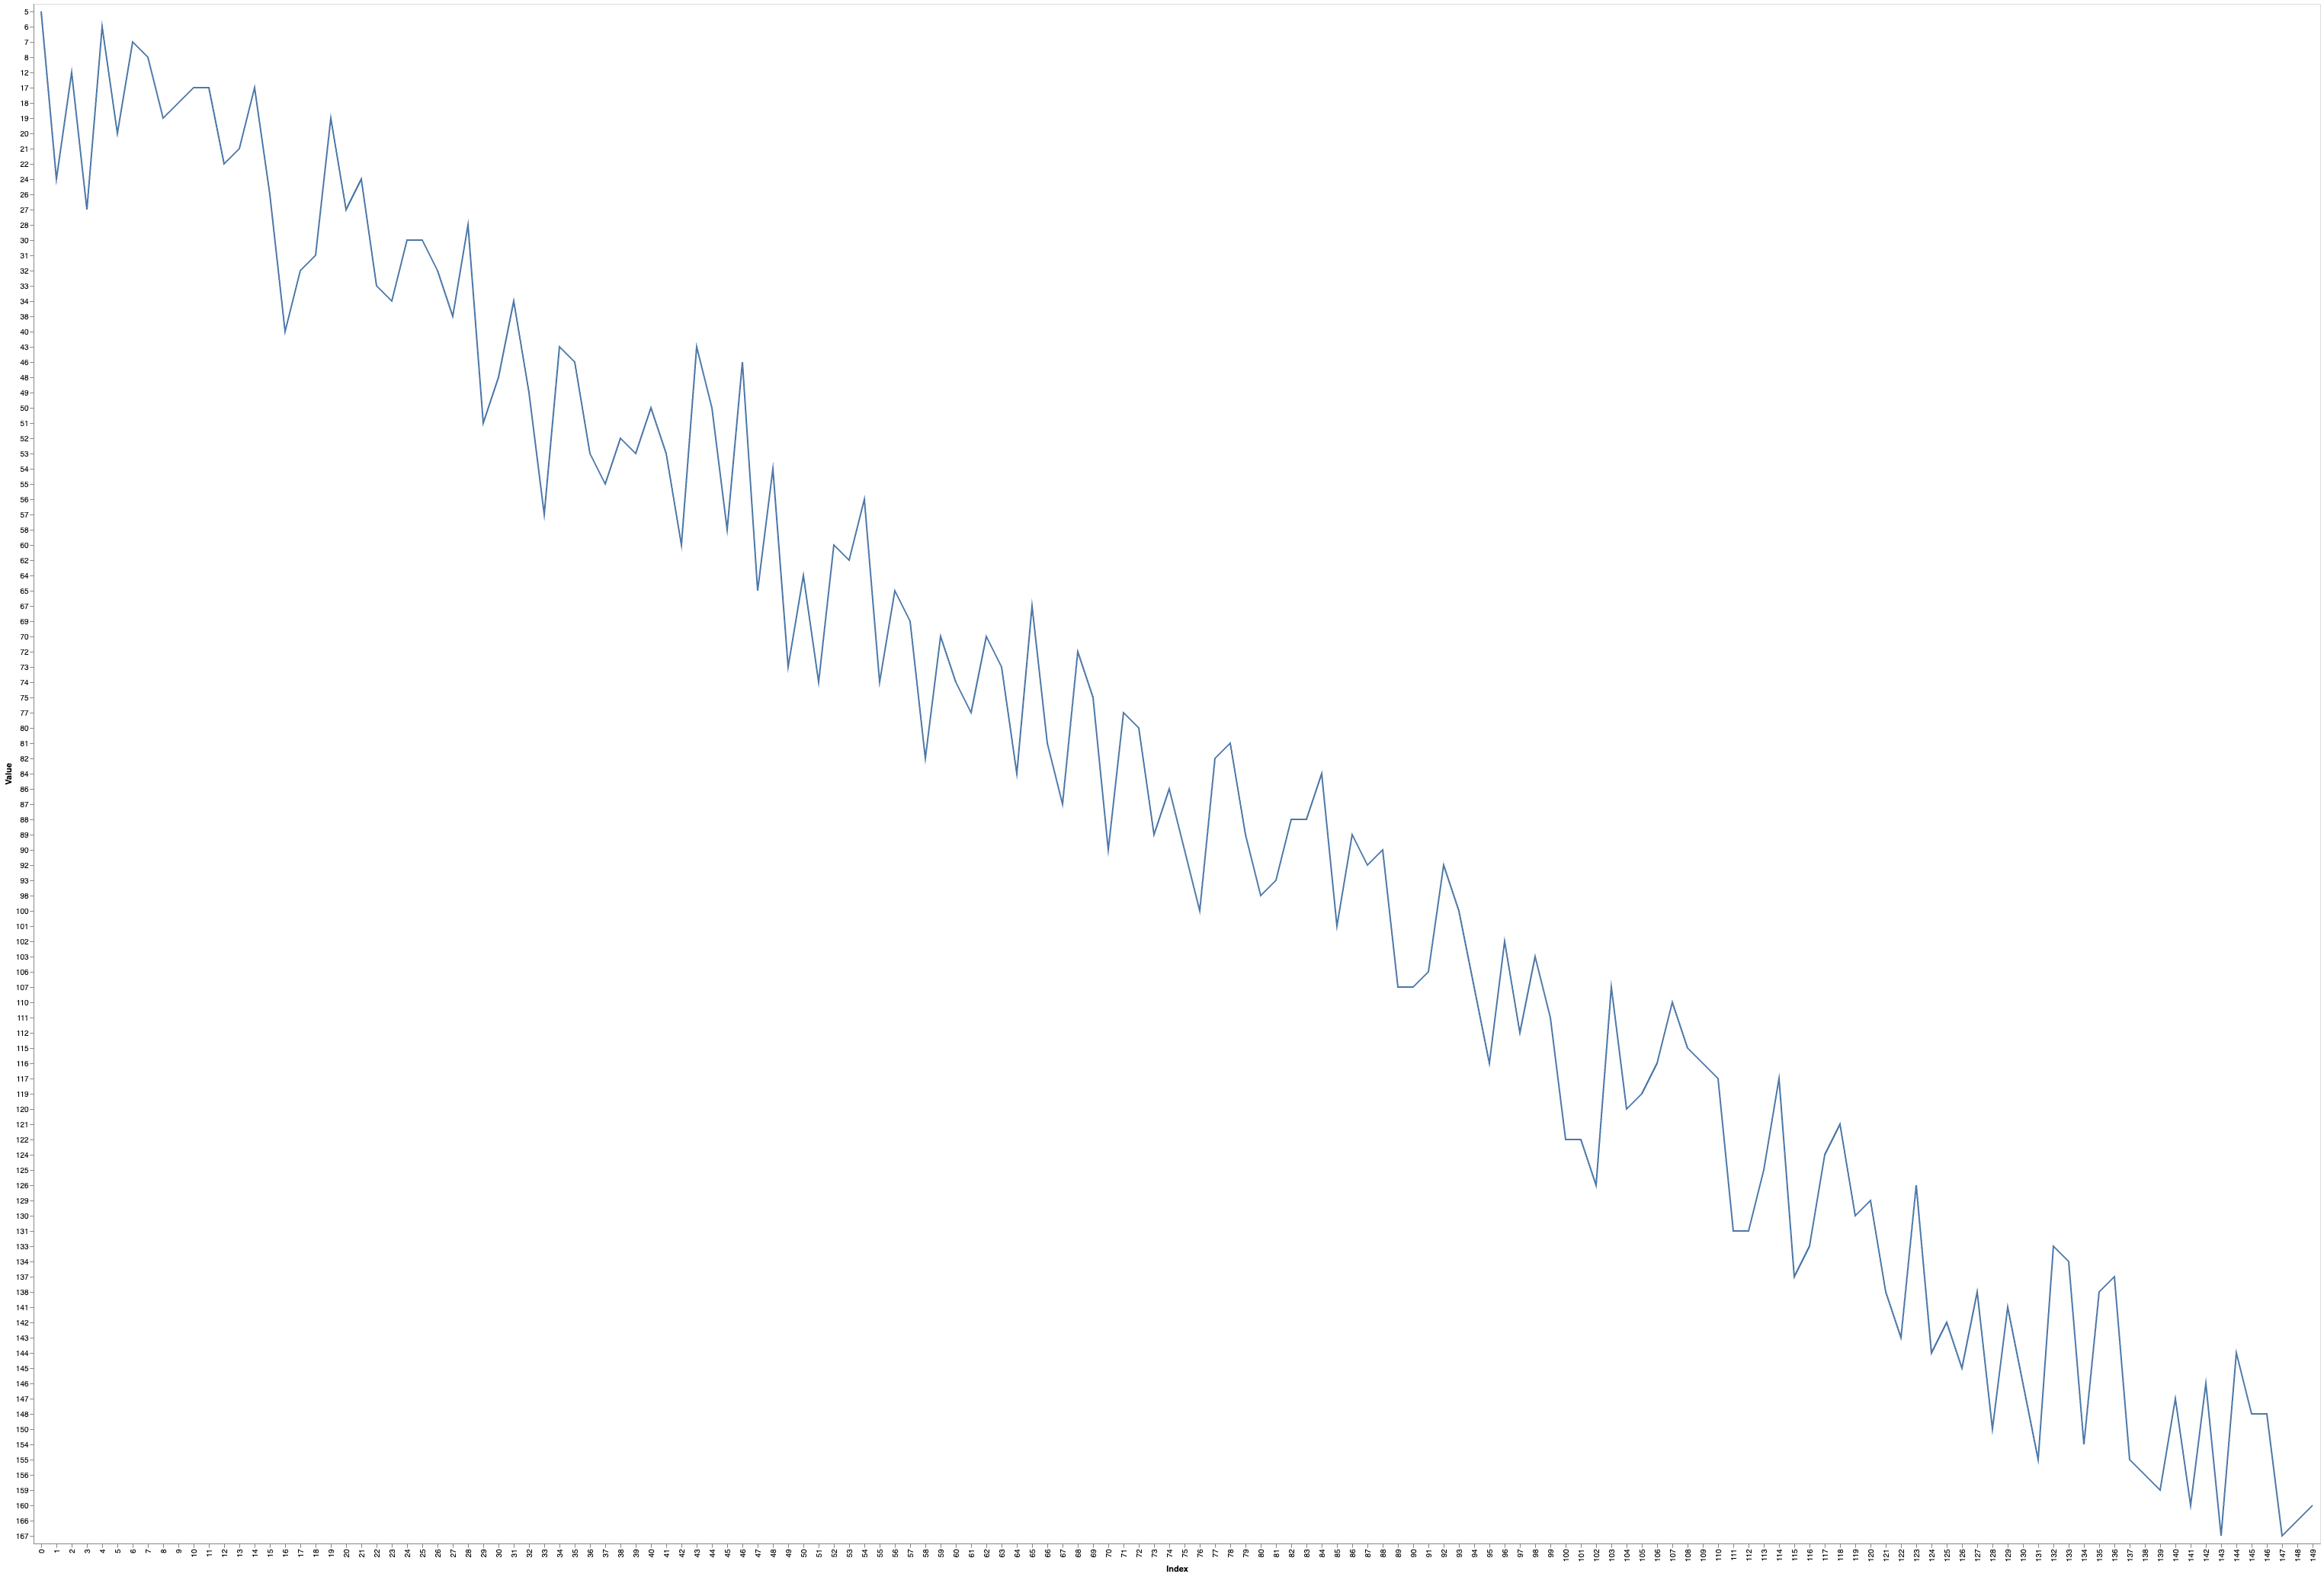

In [5]:
(let [G (->> [(range) (take 150 (raw-data))] graph-it)]
  (display/render-mime :application/vnd.vegalite.v3+json G))

**Note**: The above cell is *not* supposed to render correctly in Jupyter Notebook, <font color=red>**only Jupyter Lab**</font>.